In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 5
from obspy.clients.fdsn import Client
import obspy

# Python adaptation of lab_response.m by Carl Tape.
# Adapted from Lion Krischer
# Used in GEOS626
# Run this cell once at the beginning of each session

Inventory created at 2020-12-02T02:29:27.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2004-12-26...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			G
		Stations (1):
			G.CAN (Canberra, Australia)
		Channels (1):
			G.CAN..LHZ


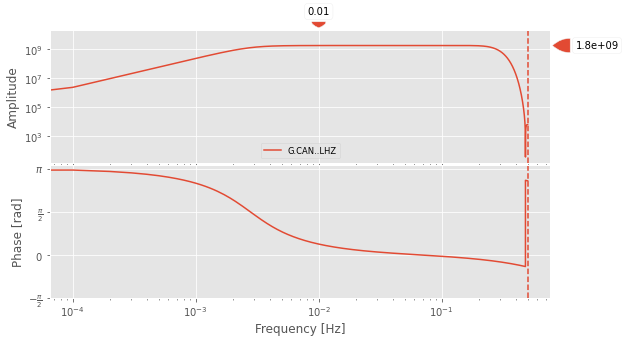

In [3]:
# Point ObsPy at the desired client:
# ObsPy knows which website to connect to for many data centers.
# For others you can also pass the full URL.
c = Client("IRIS")

# Define time period for which you want data:
starttime = obspy.UTCDateTime(2004, 12, 26, 0, 58, 50)
# Create a new time object by adding 5 days to the previous ones. Time
# differences are in seconds.
endtime = starttime + 86400 * 5

# This will get all stations that satisfy all constraints simultaneosly.
inv = c.get_stations(network="G", station="CAN", channel="LHZ", 
                     level="response", 
                     starttime=starttime, endtime=endtime)
print(inv)

# Inspect the instrument response:
inv.plot_response(min_freq=0.0001);

No handles with labels found to put in legend.


Channel Response
	From M/S (VELOCITY in Meters Per Second) to COUNTS (DIGITAL UNIT in Counts)
	Overall Sensitivity: 1.84484e+09 defined at 0.010 Hz
	5 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 2252
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 819200
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


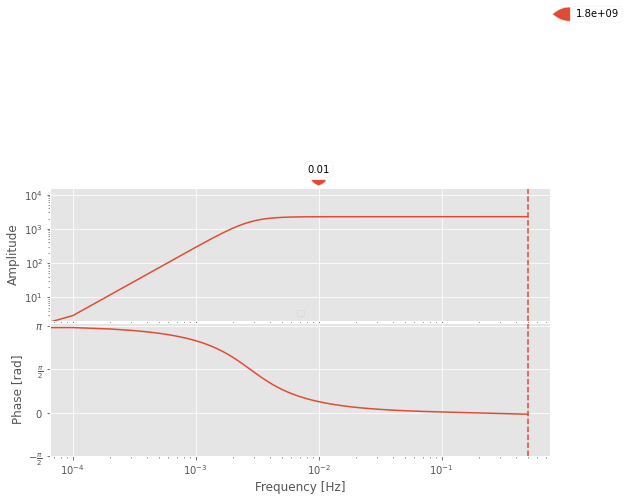

In [6]:
# See more details about the response:
print(inv[0][0][0].response)

# Can leave out the digitizer and FIR filters, and examine the "simple" pole-zero plot:
inv[0][0][0].plot(0.0001, start_stage=1, end_stage=1);

Displacement


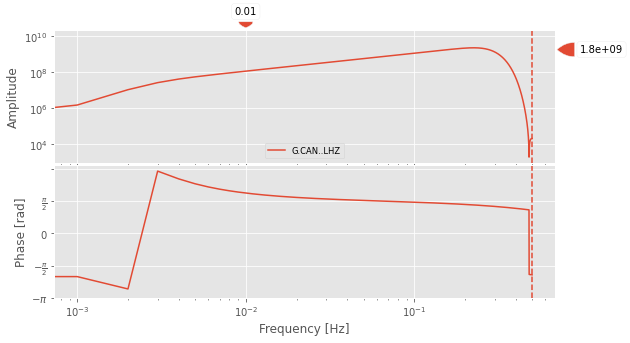

Velocity


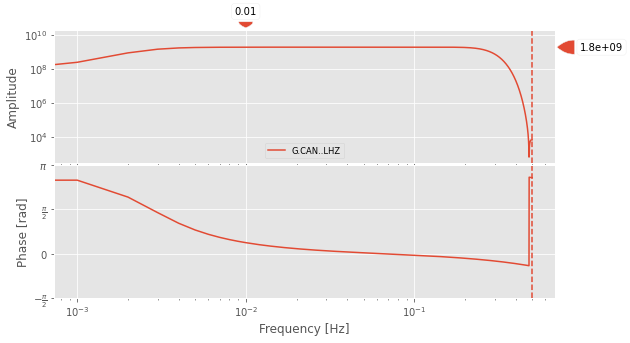

Acceleration


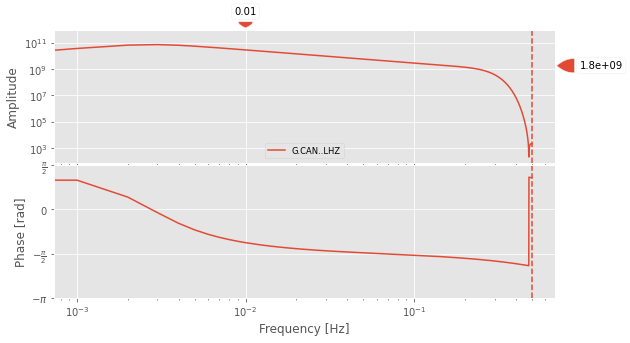

In [7]:
# See the instrument response from displacement, velocity, and acceleration
print("Displacement")
inv.plot_response(0.001, output="DISP")
print("Velocity")
inv.plot_response(0.001, output="VEL")
print("Acceleration")
inv.plot_response(0.001, output="ACC");